In [25]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [26]:
% matplotlib inline

In [27]:
# pylab inline (either in the notebook or as an argument starting the notebook)
# will by default load numpy as np and matplotlib.pylab as plt
# Let's import everything else we used last time as well:

import pandas as pd
import seaborn as sns
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

In [28]:
import numpy as np

## Data Exploration and Visualization

### Objectives

* learn how to group and aggregate data in pandas

* learn how to visualise data with pandas

* explain the difference between cast and melt in terms of a data frame

* explore common visual relationships in data

* learn two visualizations packages in python indepedent of pandas

## Matplotlib Basics

Matplotlib functions will start with plt. In science we work with the concept of a figure, which is the space in which plots exists.  While the below code is for plot, others are common as well (such as hist)

In [29]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

## Aggregating Data

Exploring the raw data can be benefited by exploring the data as a whole through grouping and aggregations. Data aggregations and segmentations allows us to better understand and evaluate the properties of our data, particularly when we have a target variable in mind.

In [30]:
columns = """-- The attributes are (dontated by Riccardo Leardi, 
    riclea@anchem.unige.it )
    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash  
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10)Color intensity
    11)Hue
    12)OD280/OD315 of diluted wines
    13)Proline"""

In [31]:
# we can generate the columns list using some string and list functions.
columns = columns.split('\n')
columns = [i.strip() for i in columns][2:]
columns = [i.split(')')[1].strip().lower() for i in columns]
cols = ['class']
cols.extend(columns)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url, header=None)
wine.columns = cols
wine.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
# Create a groupby object:
winegroups = wine.groupby('class')
print type(winegroups)

# groupby objects allow for some standard pandas calls:

winegroups.describe()

<class 'pandas.core.groupby.DataFrameGroupBy'>


alcalinity of ash    alcohol        ash  color intensity  flavanoids        hue   magnesium  malic acid  nonflavanoid phenols  od280/od315 of diluted wines  proanthocyanins      proline  total phenols
class                                                                                                                                                                                                                
1     count          59.000000  59.000000  59.000000        59.000000   59.000000  59.000000   59.000000   59.000000             59.000000                     59.000000        59.000000    59.000000      59.000000
      mean           17.037288  13.744746   2.455593         5.528305    2.982373   1.062034  106.338983    2.010678              0.290000                      3.157797         1.899322  1115.711864       2.840169
      std             2.546322   0.462125   0.227166         1.238573    0.397494   0.116483   10.498949    0.688549              0.070049                      0.357077         0.412109   221.520767       0.338961
      min            11.200000  12.850000   2.040000         3.520000    2.190000   0.820000   89.000000    1.350000              0.170000                      2.510000         1.250000   680.000000       2.200000
      25%            16.000000  13.400000   2.295000         4.550000    2.680000   0.995000   98.000000    1.665000              0.255000                      2.870000         1.640000   987.500000       2.600000
      50%            16.800000  13.750000   2.440000         5.400000    2.980000   1.070000  104.000000    1.770000              0.290000                      3.170000         1.870000  1095.000000       2.800000
      75%            18.700000  14.100000   2.615000         6.225000    3.245000   1.130000  114.000000    1.935000              0.320000                      3.420000         2.090000  1280.000000       3.000000
      max            25.000000  14.830000   3.220000         8.900000    3.930000   1.280000  132.000000    4.040000              0.500000                      4.000000         2.960000  1680.000000       3.880000
2     count          71.000000  71.000000  71.000000        71.000000   71.000000  71.000000   71.000000   71.000000             71.000000                     71.000000        71.000000    71.000000      71.000000
      mean           20.238028  12.278732   2.244789         3.086620    2.080845   1.056282   94.549296    1.932676              0.363662                      2.785352         1.630282   519.507042       2.258873
      std             3.349770   0.537964   0.315467         0.924929    0.705701   0.202937   16.753497    1.015569              0.123961                      0.496573         0.602068   157.211220       0.545361
      min            10.600000  11.030000   1.360000         1.280000    0.570000   0.690000   70.000000    0.740000              0.130000                      1.590000         0.410000   278.000000       1.100000
      25%            18.000000  11.915000   2.000000         2.535000    1.605000   0.925000   85.500000    1.270000              0.270000                      2.440000         1.350000   406.500000       1.895000
      50%            20.000000  12.290000   2.240000         2.900000    2.030000   1.040000   88.000000    1.610000              0.370000                      2.830000         1.610000   495.000000       2.200000
      75%            22.000000  12.515000   2.420000         3.400000    2.475000   1.205000   99.500000    2.145000              0.430000                      3.160000         1.885000   625.000000       2.560000
      max            30.000000  13.860000   3.230000         6.000000    5.080000   1.710000  162.000000    5.800000              0.660000                      3.690000         3.580000   985.000000       3.520000
3     count          48.000000  48.000000  48.000000        48.000000   48.000000  48.000000   48.000000   48.000000             48.000000                     48

In [33]:
winegroups.sum()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
class,,,,,,,,,,,,,
1,810.94,118.63,144.88,1005.2,6274,167.57,175.96,17.11,112.06,326.170000,62.660,186.31,65827
2,871.79,137.22,159.38,1436.9,6713,160.38,147.74,25.82,115.75,219.150000,74.996,197.76,36885
3,631.38,160.02,116.98,1028.0,4767,80.58,37.51,21.48,55.37,355.019999,32.770,80.81,30235


In [34]:
print winegroups.alcohol.mean()
print winegroups[['alcohol', 'ash']].median()

class
1    13.744746
2    12.278732
3    13.153750
Name: alcohol, dtype: float64
       alcohol   ash
class               
1       13.750  2.44
2       12.290  2.24
3       13.165  2.38


In [35]:
## can work through aggregation dictionaries, which can reference the origin
## groupby functions, or construct new functions.

print winegroups.agg({'alcohol': 'median'})
print winegroups.agg({'alcohol': lambda alcohol: alcohol.nunique() / alcohol.count()})

       alcohol
class         
1       13.750
2       12.290
3       13.165
        alcohol
class          
1      0.830508
2      0.704225
3      0.937500


## Pivot Tables

Pivot tables are another aggregation tool provided in pandas. Use pivot tables when:

1. We want to easily compare results of variables across groups

2. We want to easily plot results along the index.

In [36]:
pivoted_wine = wine.pivot_table(values='ash',
                 columns='class',
                 index='alcohol',
                 aggfunc='count')

## Aggregation shapes

Sometimes we'll need to "melt" or "cast" our aggregation into a different shape, mostly in the context of plotting or applying aggregatiosn as new fields in the original data set.  Consider the use of melt() here.

In [37]:
pivoted_wine_reset = pivoted_wine.reset_index()
print pivoted_wine_reset.head()

print pd.melt(pivoted_wine_reset,
              id_vars=['alcohol'],
              value_vars=[1, 2, 3],
              value_name='count').dropna().head(20)

class  alcohol   1    2   3
0        11.03 NaN  1.0 NaN
1        11.41 NaN  1.0 NaN
2        11.45 NaN  1.0 NaN
3        11.46 NaN  1.0 NaN
4        11.56 NaN  1.0 NaN
    alcohol class  count
51    12.85     1    1.0
55    12.93     1    1.0
59    13.05     1    4.0
60    13.07     1    1.0
63    13.16     1    1.0
65    13.20     1    1.0
67    13.24     1    2.0
69    13.28     1    1.0
70    13.29     1    1.0
71    13.30     1    1.0
75    13.39     1    1.0
77    13.41     1    1.0
79    13.48     1    1.0
81    13.50     1    1.0
82    13.51     1    1.0
84    13.56     1    2.0
85    13.58     1    1.0
87    13.63     1    1.0
88    13.64     1    1.0
90    13.68     1    1.0


## Baseball Stats

We'll pull in the Lahman batting stats for data visualisation. There's only one table in the Lahman database for now; we''' add more as class moves forward. As mentioned before, pandas can read in data from databases as well, using a db engine/connection.

Below includes the columns and their meanings:

* player         Player ID code
* year           Year
* stint          player's stint (order of appearances within a season)
* team           Team
* lgID           League
* G              Games
* AB             At Bats
* R              Runs
* H              Hits
* X2B            Doubles
* X3B            Triples
* HR             Homeruns
* RBI            Runs Batted In
* SB             Stolen Bases
* CS             Caught Stealing
* BB             Base on Balls
* SO             Strikeouts
* IBB            Intentional walks
* HBP            Hit by pitch
* SH             Sacrifice hits
* SF             Sacrifice flies
* GIDP           Grounded into double plays

In [38]:
import sqlite3

In [39]:
con = sqlite3.connect("C:\Users\James\Desktop\Classess\GADataScience\Class_Notes\lahman.sqlite")

In [40]:
df = pd.read_sql("SELECT * FROM batting", con)
df = df.convert_objects(convert_numeric = True)

# Reminder: Many functions from data frames will work on groupby objects!
# What is below doing?
df.groupby('year').head(1)

c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from IPython.kernel.zmq import kernelapp as app


,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,abercda01,1871,1,TRO,NA,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
115,allenha01,1872,1,MID,NA,16,66.0,8.0,18.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
271,addybo01,1873,1,PH2,NA,10,51.0,12.0,16.0,1.0,0.0,0.0,10.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
396,addybo01,1874,1,HR1,NA,50,213.0,25.0,51.0,9.0,2.0,0.0,23.0,4.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
519,abadijo01,1875,1,PH3,NA,11,45.0,3.0,10.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
737,addybo01,1876,1,CHN,NL,32,142.0,36.0,40.0,4.0,1.0,0.0,16.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN
861,addybo01,1877,1,CN1,NL,57,245.0,27.0,68.0,2.0,3.0,0.0,31.0,NaN,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN
958,allisdo01,1878,1,PRO,NL,19,76.0,9.0,22.0,2.0,0.0,0.0,7.0,NaN,NaN,1.0,8.0,NaN,NaN,NaN,NaN,NaN
1038,adamsge01,1879,1,SR1,NL,4,13.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1165,ahearch01,1880,1,TRN,NL,1,4.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Single Variable Plots: Histograms and Boxplots

To best understand a feature on its own, we explore it using histograms. Histograms help us understand the distribution of data.

**What shouild we be looking for?**

1. Width of the data. Use this alongside standard deviation to understand scope.

2. Distributions. NYU has a nice guideline to consider. We'll go over distributions as they arise. But in particular:

3. Expected vs Actual: Is this the shape we expected? Does it make sense given the feature?

4. Segments: What jumps out as interesting? For example, are we interested in observing an 80/20 problem, or interested in the majority?

**Ways we generate histograms:**

1. df.col.hist() : pandas integrates with matplotlib to build histograms on the fly. Pass in multiple columns to generate multiple histograms at the same time.

2. plt.hist(): direct matplotlib code.

**Ways we generate boxplots:**

1. df.col.boxplot() : pandas integration for boxplots. Pass in multiple columns to generate multiple boxplots at the same time.

2. plt.boxplot(): direct matplotlib code.

c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:14: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0xd57cc88>],
 'caps': [<matplotlib.lines.Line2D at 0xad0a9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xace5a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xace5518>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd57ce48>,
  <matplotlib.lines.Line2D at 0xad0a470>]}

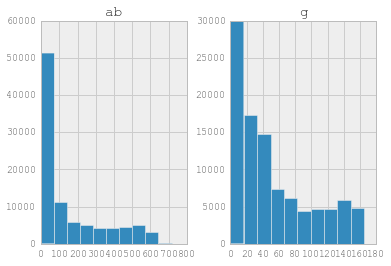

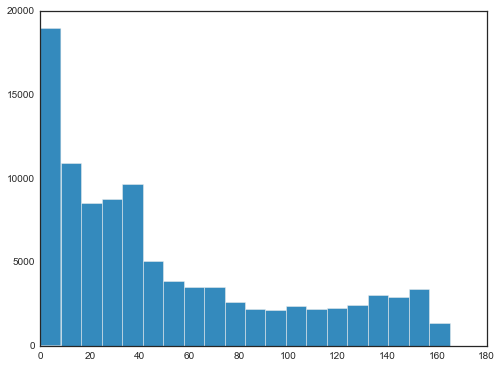

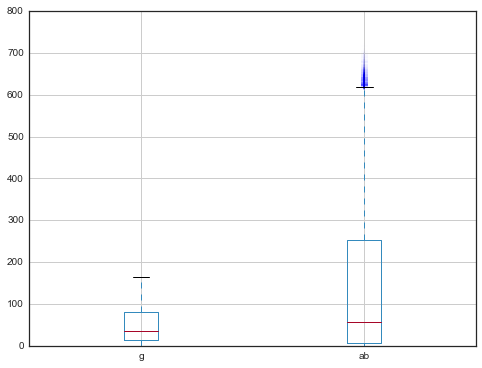

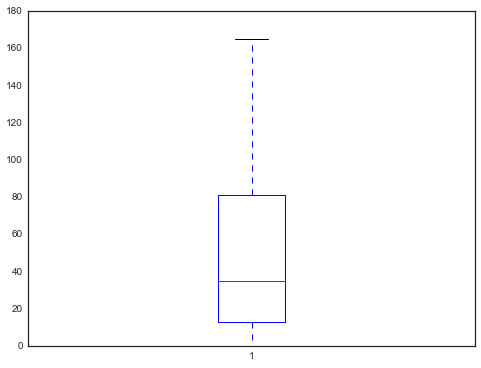

In [41]:
## Histograms
# pandas style
df[['g', 'ab']].hist()

# matplotlib style
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(df.g, bins=20)

## Boxplots
# pandas style
plt.figure(figsize=(8, 6), dpi=80)
df[['g', 'ab']].boxplot()

# matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.boxplot(df.g)

**Doing histograms faster**

1. How do we use a for loop to generate a plot of each numeric field? Consider checking the fields dtype before making the plots

2. Wrap your histogram three-liner as a function. We should be in the habit of always generating figures and subplots, but it's less necessary to have to write all code each time you want to do so.

**Multivariable plots: Scatterplots**

While histograms allow us to explore fields individually, scatter plots allow us to compare and correlate data points.

**What to look for**

1. Degrees of correlation (+/-). Are the two features positively or negatively correlated? What's the impact of one on the other?

2. Type of relationship. Is the relationship linear? Polynomial? Logarithmic?

**Ways we generate scatter plots:**

1. df.plot(type='scatter') : pandas integrates with matplotlib to build scatter plots on the fly.

2. plt.plot(): direct matplotlib code. You'll have to specify the marker.

3. plt.scatter(): simpler context for matplotlib

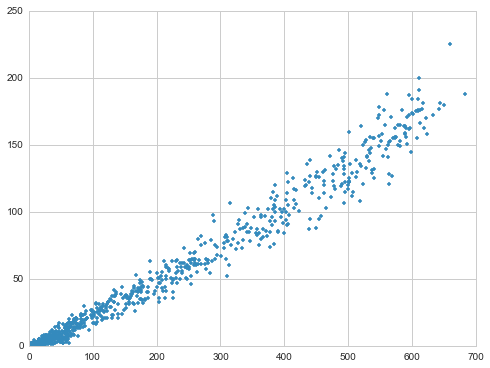

c:\Users\James\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


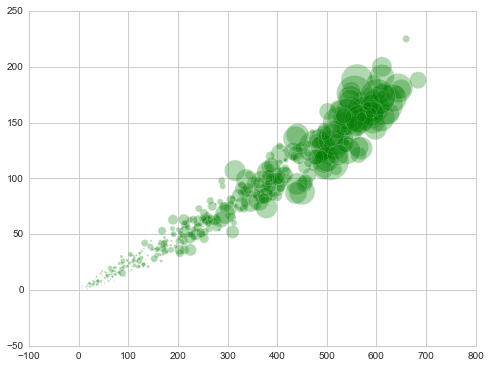

In [43]:
last_year = df[df.year == 2014]
sns.set_style('whitegrid')

# using plot and the '.' notation.
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(last_year.ab, last_year.h, '.')

# using scatter, and setting additional parameters.
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.scatter(last_year.ab, last_year.h, s=last_year.hr**2, alpha=0.3, c='g')

## Other useful pandas plots

**Trellis Plotting**

Trellis plotting is a technique to group histograms or scatterplots based on a segmentation. This will be familiar to R users (the lattice package adds this functionality, as well as ggplot's facet_grid). Trellis plotting helps us easily identify how a feature can change dependent on another. Trellis plotting is built into pandas.

Figure(480x320)


c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.
  if __name__ == '__main__':


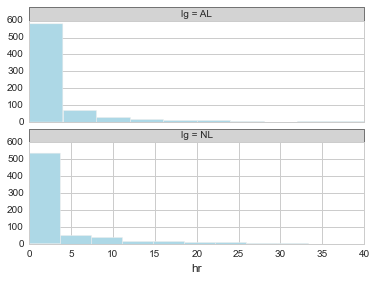

In [44]:
import pandas.tools.rplot as rplot
    
plt.figure()
plot = rplot.RPlot(last_year, x='hr')
plot.add(rplot.TrellisGrid(['lg','.']))
plot.add(rplot.GeomHistogram())
print plot.render(plt.gcf())

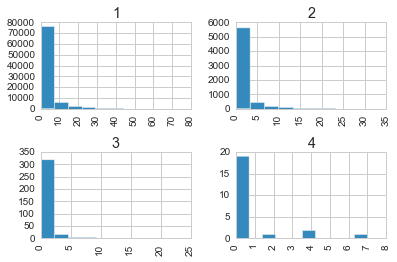

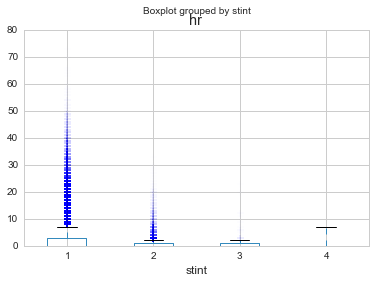

In [45]:
plt.figure()
df[df.stint < 5].hist('hr', by='stint')

plt.figure()
df[df.stint < 5].boxplot('hr', by='stint')

**Scatter Matrix**

While doing this through each variable could be conveniently handled in a for loop or using a trellis plot, pandas includes a scatter_matrix which will provide both a histogram of each numeric field, but also a scatter plot for each field comparison. Use this wisely, as it's rather heavy plotting, and therefore, dependent on your data, memory intensive. You can, of course, subset to columns you are interested in comparing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A17B160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9657B8>]], dtype=object)

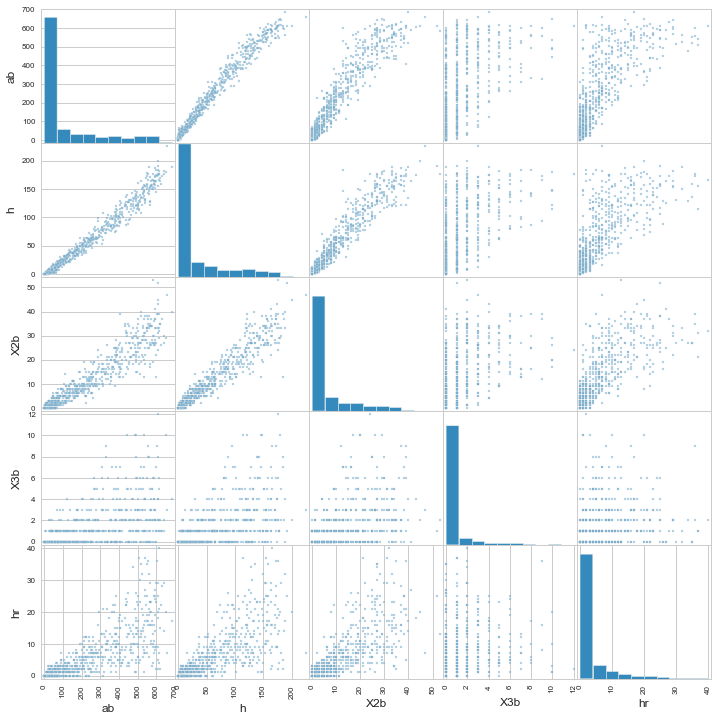

In [46]:
cols = ['ab', 'h', 'X2b', 'X3b', 'hr',]
pd.scatter_matrix(last_year[cols], figsize=(12, 12))

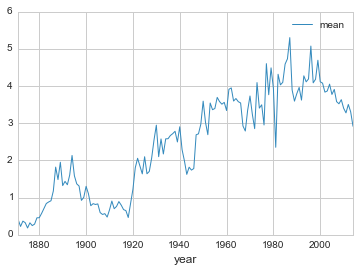

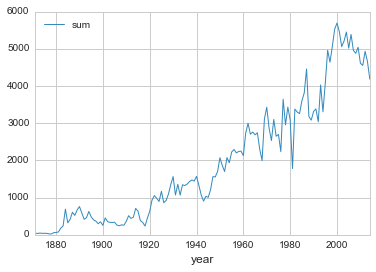

In [47]:
years_grouped = df.groupby('year')

plt.figure()
years_grouped.hr.agg(['mean']).plot()

plt.figure()
years_grouped.hr.agg(['sum']).plot()

SyntaxError: invalid syntax (<ipython-input-49-b6eef82c14c1>, line 1)